In [47]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('stroke.csv')
df.shape

(5110, 12)

In [3]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
df[df['gender']=='Other'].index.values

array([3116])

In [10]:
df = df.drop(3116)

In [11]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [12]:
df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [13]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [14]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [16]:
mean_bmi = round(df["bmi"].mean())
df['bmi'].fillna(mean_bmi, inplace = True)
df = df.drop(['bmi'], axis=1)

df['gender'] = df['gender'].replace({'Male':0, 'Female':1})
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0, 'Unknown':3,
                                                      'formerly smoked':1, 'smokes':2})

df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0})
df['work_type'] = df['work_type'].replace({'Private':0, 'Self-employed':1,
                                           'children':2, 'Govt_job':3,
                                           'Never_worked': 4})

df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

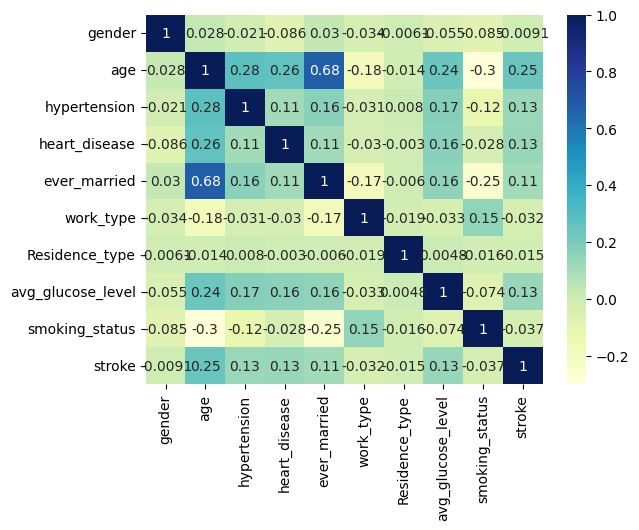

In [17]:
corr_plot = sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [18]:
df.shape

(5109, 10)

In [19]:
x = df.iloc[:, :-1]
y = df.iloc[:, 9:]

In [20]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,0,67.0,0,1,1,0,0,228.69,1
1,1,61.0,0,0,1,1,1,202.21,0
2,0,80.0,0,1,1,0,1,105.92,0
3,1,49.0,0,0,1,0,0,171.23,2
4,1,79.0,1,0,1,1,1,174.12,0
...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,0,83.75,0
5106,1,81.0,0,0,1,1,0,125.20,0
5107,1,35.0,0,0,1,1,1,82.99,0
5108,0,51.0,0,0,1,0,1,166.29,1


In [21]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [22]:
smote = SMOTE(random_state=123)
x, y = smote.fit_resample(x, y)

In [23]:
y.value_counts()

stroke
0         4860
1         4860
dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
print(x_train.shape)
print(x_test.shape)

(7776, 9)
(1944, 9)


In [27]:
# from sklearn.metrics import *
# from sklearn.model_selection import *
# model = RandomForestClassifier()

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_lr = lr.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_dtc = dtc.predict(x_test)

In [34]:
print("Accuracy of lr: ", accuracy_score(y_test, y_pred_lr))
print("Accuracy of nb: ", accuracy_score(y_test, y_pred_nb))
print("Accuracy of dtc: ", accuracy_score(y_test, y_pred_dtc))

Accuracy of lr:  0.8173868312757202
Accuracy of nb:  0.7808641975308642
Accuracy of dtc:  0.8796296296296297


In [35]:
confusion_matrix(y_test, y_pred_lr)

array([[773, 189],
       [166, 816]])

In [36]:
confusion_matrix(y_test, y_pred_dtc)

array([[826, 136],
       [ 98, 884]])

In [37]:
confusion_matrix(y_test, y_pred_nb)

array([[709, 253],
       [173, 809]])

In [38]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,1,1


In [39]:
age            = int(input("Enter Age                                                         : "))
sex            = int(input("Enter gender(Male-0, Female-1): "))
hypertension   = int(input("Enter hypertension(0-don't have hypertension, 1-have hypertension): "))
heartdis       = int(input('Enter heartdisease(0-doesn\'t have heartdisease, 1-have heart disease): '))
ever_married   = int(input('Enter Marriage status(0-No, 1-Yes): '))
work_type      = int(input('Enter worktype(Private-0, Self-Employed-1, Student-2, Govt_Jobs-3, Never_Worked-4): '))
residence      = int(input("Enter residence type(Urban-0, Rural-1): "))
avg_glucose    = int(input("Enter Average Glucose level(80 mg/dl): "))
smoking_status = int(input("Enter present smoking status(Never  Smoked-0, Formerly Smoked-1, Smokes-2): "))

Enter Age                                                         : 20
Enter gender: 0
Enter hypertension(0-don't have hypertension, 1-have hypertension): 0
Enter heartdisease(0-doesn't have heartdisease, 1-have heart disease): 0
Enter Marriage status(0-No, 1-Yes): 0
Enter worktype(Private-0, Self-Employed-1, Student-2, Govt_Jobs-3, Never_Worked-4): 1
Enter residence type(Urban-0, Rural-1): 1
Enter Average Glucose level(80 mg/dl): 220
Enter present smoking status(Never  Smoked-0, Formerly Smoked-1, Smokes-2): 0


In [40]:
x2 = np.array([age]).reshape(1, -1)
x2 = sc.fit_transform(x2)
bool1 = [sex, hypertension, heartdis, ever_married, work_type, residence, avg_glucose, smoking_status]
x2 = np.append(x2, bool1).reshape(1,-1)
prediction = lr.predict(x2)

if prediction==1:
  print("You Must be carefull there are chances to get a Stroke. So better consult a doctor")
else:
  print("Your health! Stay Strong Stay Fit")

You Must be carefull there are chances to get a Stroke. So better consult a doctor


In [41]:
import pickle

In [42]:
pickle.dump(dtc, open("stroke.pkl", 'wb'))